In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')

In [118]:

import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
#from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [119]:
df = pd.read_csv("liver_cirrhosis.csv")

In [120]:
# Column descriptions:
# N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
# Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
# Drug: type of drug D-penicillamine or placebo
# Age: age in days
# Sex: M (male) or F (female)
# Ascites: presence of ascites N (No) or Y (Yes)
# Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
# Spiders: presence of spiders N (No) or Y (Yes)
# Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# Bilirubin: serum bilirubin in [mg/dl]
# Cholesterol: serum cholesterol in [mg/dl]
# Albumin: albumin in [gm/dl]
# Copper: urine copper in [ug/day]
# Alk_Phos: alkaline phosphatase in [U/liter]
# SGOT: SGOT in [U/ml]
# Tryglicerides: triglicerides in [mg/dl]
# Platelets: platelets per cubic [ml/1000]
# Prothrombin: prothrombin time in seconds [s]
# Stage: histologic stage of disease ( 1, 2, or 3 )

In [121]:
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [122]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [123]:
df['Edema'].value_counts()

Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

In [124]:
# Missing Values
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [125]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [126]:
df.shape

(25000, 19)

In [127]:
# Check for duplicate rows in the dataframe
#duplicate_rows = df.duplicated()

# Count the number of duplicate rows
#num_duplicates = duplicate_rows.sum()
#print(f"Number of duplicate rows: {num_duplicates}")

In [128]:
# Remove duplicate rows from the dataframe
#df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
#print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

In [129]:
df.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616      52.786350     98.679006   
min        4.000000    289.000000     26.350000      33.000000     62.000000   
25%       52.000000   1032.000000     92.000000      92.000000    189.000000   
50%       97.648387   1828.000000    122.556346     124.702128    251.000000   
75%      107.000000   1982.655769    134.850000     127.000000    311.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin        Stage  
count  25000.000000  25000.00000  
mean      10.734549      2.00116  
std        0.904436      0.81387  
min        9.000000      1.00000  
25%       10.000000      1.00000  
50%       10.600000      2.00000  
75%       11.100000      3.00000  
max       18.000000      3.00000

In [130]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [131]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})
df["Stage"] = df["Stage"].map({1:0, 2:1, 3:2})

In [132]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)




In [133]:
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


With Standardizing

In [89]:
# Standardize the features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train[numericals] = scaler.fit_transform(x_train[numericals])
#x_test[numericals] = scaler.transform(x_test[numericals])


In [90]:
x_train

N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
10263    1022       1     0  18993    0        1             0        1   
18409    1234       0     0  23011    0        1             0        1   
13047    2503       2     1  19751    0        0             1        0   
21371    3672       0     0  14772    0        0             0        0   
16392    4462       2     0  23011    0        1             0        1   
...       ...     ...   ...    ...  ...      ...           ...      ...   
13123    2527       0     0  16071    0        1             0        1   
19648    1343       0     0  18263    0        1             0        1   
9845      321       2     0  24201    0        0             1        0   
10799    4509       0     0  16094    0        0             0        0   
2732      691       0     0  14245    0        1             0        1   

       Edema  Bilirubin  Cholesterol  Albumin      Copper      Alk_Phos  \
10263      1        0.8   369.510563     3.00   97.648387   1982.655769   
18409      0        6.4   373.000000     3.46  155.000000   1768.000000   
13047      0        0.8   248.000000     3.98   50.000000    944.000000   
21371      0        0.7   204.000000     3.66   28.000000    685.000000   
16392      0        1.1   498.000000     3.40   88.000000  13862.400000   
...      ...        ...          ...      ...         ...           ...   
13123      0        0.8   256.000000     3.54   42.000000   1132.000000   
19648      0        1.6   369.510563     3.48   97.648387   1982.655769   
9845       0        3.6   260.000000     2.54  172.000000   7277.000000   
10799      0        0.7   370.000000     3.78   24.000000   5833.000000   
2732       0        0.8   369.510563     3.75   97.648387   1982.655769   

             SGOT  Tryglicerides  Platelets  Prothrombin  
10263  122.556346     124.702128  165.00000         10.0  
18409  120.000000     151.000000  371.00000         10.1  
13047   93.000000      63.000000  318.00000         10.0  
21371   72.850000      58.000000  198.00000         10.8  
16392   95.460000     319.000000  371.00000         10.1  
...           ...            ...        ...          ...  
13123   74.400000      94.000000  150.00000          9.9  
19648  122.556346     124.702128  277.00000         10.2  
9845   121.260000     158.000000  257.02457         11.0  
10799   73.530000      86.000000  271.00000         10.6  
2732   122.556346     124.702128  145.00000         10.4  

[20000 rows x 18 columns]

In [91]:
y_train

10263    2
18409    2
13047    1
21371    1
16392    2
        ..
13123    1
19648    0
9845     2
10799    1
2732     1
Name: Stage, Length: 20000, dtype: int64

In [134]:
categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly",
               "Spiders", "Edema"]

In [135]:
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


ML Models

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion,Pipeline,make_pipeline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

Multinomial Logistic

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the multiclass logistic regression model
logreg_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Only L2 regularization is supported for multinomial logistic regression
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_logreg_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.5601
Test Accuracy: 0.5648

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.53      0.56      0.54       599
           1       0.51      0.43      0.47       678
           2       0.64      0.71      0.67       651

    accuracy                           0.56      1928
   macro avg       0.56      0.57      0.56      1928
weighted avg       0.56      0.56      0.56      1928


Confusion Matrix (Train Set):
 [[1372  652  402]
 [ 871 1103  656]
 [ 375  436 1844]]

Confusion Matrix (Test Set):
 [[335 169  95]
 [215 294 169]
 [ 82 109 460]]


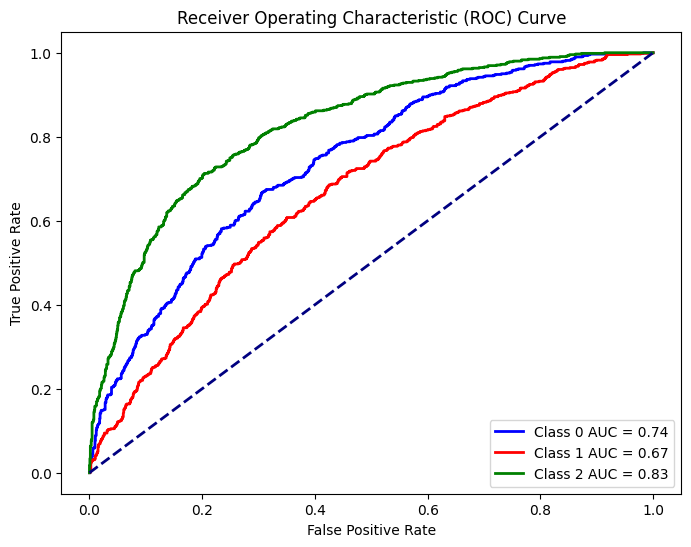

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes list according to your actual classes
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_logreg_model.predict_proba(x_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_rf_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.9916
Test Accuracy: 0.8740

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       599
           1       0.84      0.85      0.85       678
           2       0.91      0.92      0.91       651

    accuracy                           0.87      1928
   macro avg       0.87      0.87      0.87      1928
weighted avg       0.87      0.87      0.87      1928


Confusion Matrix (Train Set):
 [[2393   30    3]
 [  17 2606    7]
 [   4    4 2647]]

Confusion Matrix (Test Set):
 [[513  72  14]
 [ 60 575  43]
 [ 19  35 597]]


In [26]:
# Print the best parameters selected by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


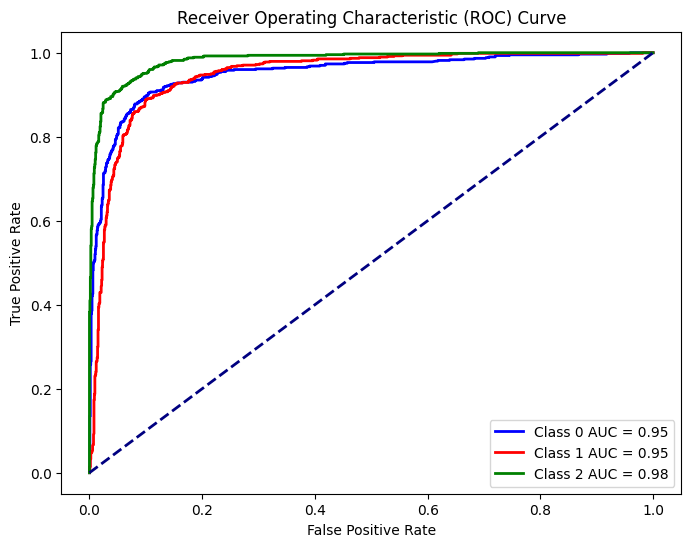

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes as per your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_rf_model.predict_proba(x_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


SVM Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier with probability estimates enabled
svm_classifier = SVC(probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_svm_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_svm_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.8389
Test Accuracy: 0.7484

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       599
           1       0.71      0.69      0.70       678
           2       0.82      0.84      0.83       651

    accuracy                           0.75      1928
   macro avg       0.75      0.75      0.75      1928
weighted avg       0.75      0.75      0.75      1928


Confusion Matrix (Train Set):
 [[2008  321   97]
 [ 345 2154  131]
 [ 144  204 2307]]

Confusion Matrix (Test Set):
 [[429 121  49]
 [140 470  68]
 [ 40  67 544]]


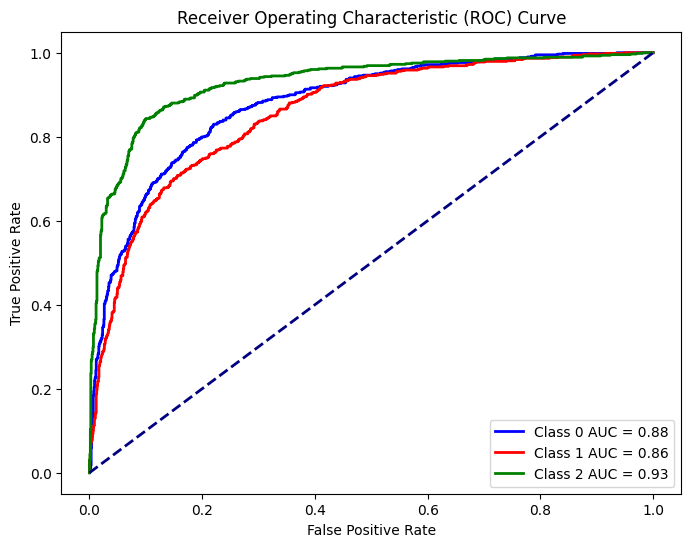

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_svm_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the train set
y_pred_train_knn = best_knn_model.predict(x_train)

# Make predictions on the test set
y_pred_test_knn = best_knn_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
train_conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)

# Evaluate the performance on the test set
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
test_conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
classification_report_result_knn = classification_report(y_test, y_pred_test_knn)

# Print the results
print(f'Train Accuracy (KNN): {train_accuracy_knn:.4f}')
print(f'Test Accuracy (KNN): {test_accuracy_knn:.4f}')
print('\nClassification Report (KNN - Test Set):\n', classification_report_result_knn)

print('\nConfusion Matrix (KNN - Train Set):\n', train_conf_matrix_knn)
print('\nConfusion Matrix (KNN - Test Set):\n', test_conf_matrix_knn)


Train Accuracy (KNN): 0.9917
Test Accuracy (KNN): 0.8237

Classification Report (KNN - Test Set):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       599
           1       0.78      0.79      0.79       678
           2       0.89      0.88      0.88       651

    accuracy                           0.82      1928
   macro avg       0.82      0.82      0.82      1928
weighted avg       0.82      0.82      0.82      1928


Confusion Matrix (KNN - Train Set):
 [[2426    0    0]
 [  46 2584    0]
 [   7   11 2637]]

Confusion Matrix (KNN - Test Set):
 [[479 100  20]
 [ 91 537  50]
 [ 27  52 572]]


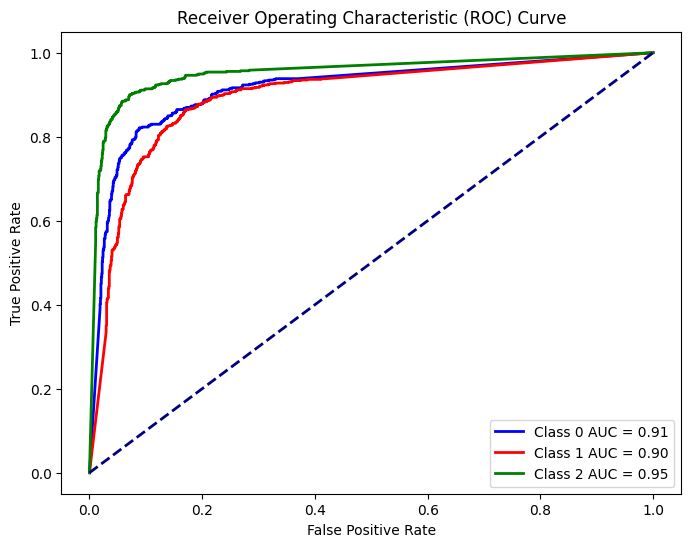

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_knn_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


DecisionTreeClassifier

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base classifier (DecisionTreeClassifier in this example)
base_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_bagging_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9905
Test Accuracy: 0.8755

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       599
           1       0.85      0.84      0.85       678
           2       0.90      0.93      0.91       651

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928


Confusion Matrix (Train Set):
[[2384   37    5]
 [  17 2607    6]
 [   2    6 2647]]

Confusion Matrix (Test Set):
[[514  68  17]
 [ 56 571  51]
 [ 18  30 603]]


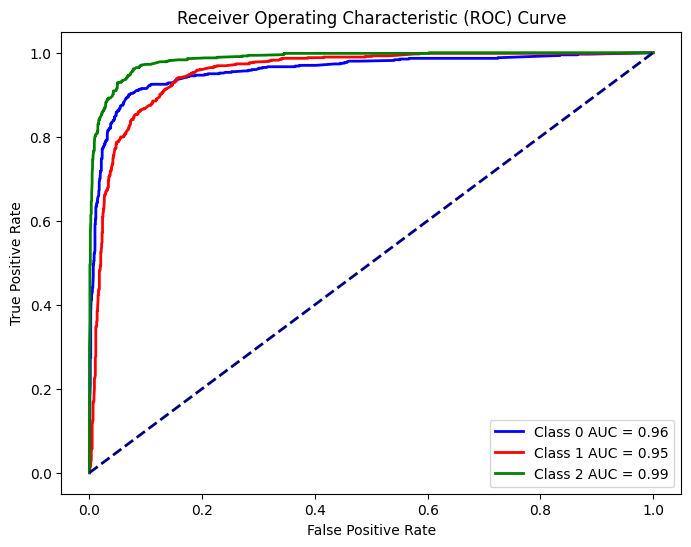

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_bagging_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoost classifier with a DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [1, 2, 3],  # Parameters for the base estimator (DecisionTreeClassifier)
    'estimator__min_samples_split': [2, 5, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_adaboost_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_adaboost_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.8772
Test Accuracy: 0.8320

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       599
           1       0.78      0.82      0.80       678
           2       0.90      0.86      0.88       651

    accuracy                           0.83      1928
   macro avg       0.83      0.83      0.83      1928
weighted avg       0.83      0.83      0.83      1928


Confusion Matrix (Train Set):
[[2100  271   55]
 [ 230 2243  157]
 [  67  167 2421]]

Confusion Matrix (Test Set):
[[489  94  16]
 [ 73 558  47]
 [ 31  63 557]]


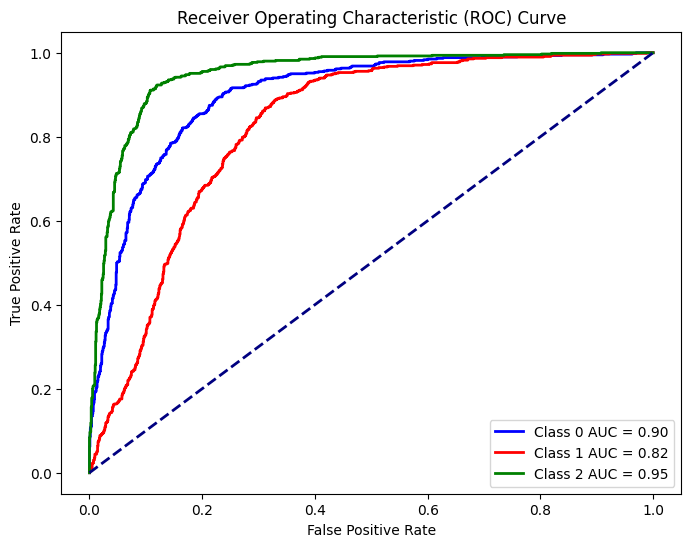

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_adaboost_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


CatBoost

In [36]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier(silent=True)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'colsample_bylevel': [0.8, 1.0],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_catboost_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_catboost_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_catboost_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9617
Test Accuracy: 0.8838

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       599
           1       0.85      0.87      0.86       678
           2       0.92      0.92      0.92       651

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928


Confusion Matrix (Train Set):
[[2296  101   29]
 [  61 2529   40]
 [  28   36 2591]]

Confusion Matrix (Test Set):
[[517  63  19]
 [ 53 591  34]
 [ 17  38 596]]


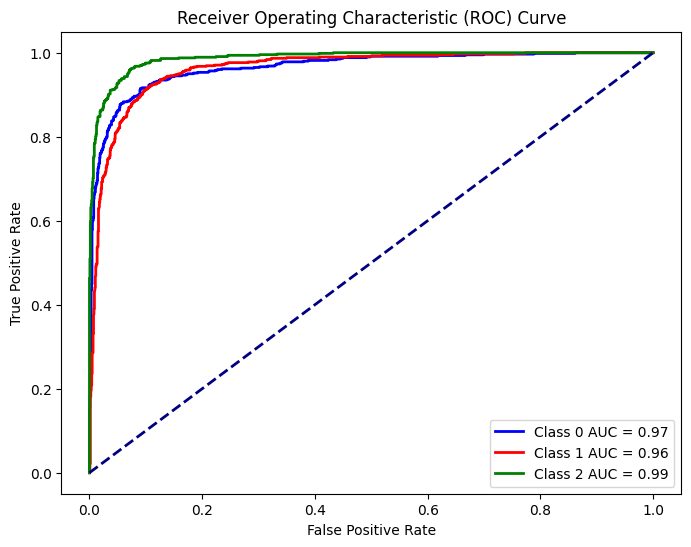

In [37]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assume you have already trained the best CatBoost model (best_catboost_model)
# and have the test data (x_test, y_test)

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_catboost_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Bagging Classifier

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the Bagging classifier with the base estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'max_samples': [0.8, 1.0],       # Number of samples to draw from X to train each base estimator
    'max_features': [0.8, 1.0],      # Number of features to draw from X to train each base estimator
    'estimator__max_depth': [3, 5, 7]  # Depth of the base estimator trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_bagging_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.8278
Test Accuracy: 0.7899

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       599
           1       0.72      0.80      0.76       678
           2       0.84      0.81      0.83       651

    accuracy                           0.79      1928
   macro avg       0.80      0.79      0.79      1928
weighted avg       0.79      0.79      0.79      1928


Confusion Matrix (Train Set):
[[1945  391   90]
 [ 186 2223  221]
 [ 129  311 2215]]

Confusion Matrix (Test Set):
[[454 115  30]
 [ 67 543  68]
 [ 33  92 526]]


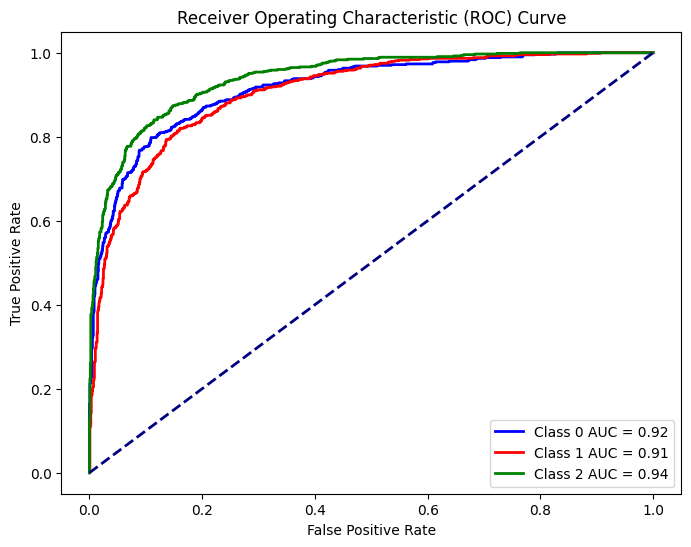

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_bagging_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Common parameter for GaussianNB
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_nb_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_nb_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_nb_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)



Train Accuracy: 0.5046
Test Accuracy: 0.4969

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.43      0.72      0.54       599
           1       0.46      0.25      0.33       678
           2       0.64      0.54      0.59       651

    accuracy                           0.50      1928
   macro avg       0.51      0.51      0.49      1928
weighted avg       0.51      0.50      0.48      1928


Confusion Matrix (Train Set):
[[1844  302  280]
 [1478  668  484]
 [ 831  445 1379]]

Confusion Matrix (Test Set):
[[432  87  80]
 [389 172 117]
 [183 114 354]]


In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Assuming you're using a Multinomial Naive Bayes model (adjust according to your needs)
nb_classifier = MultinomialNB()

# Define the parameter grid for GridSearchCV if you want to tune hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Example: smoothing parameter
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_naive_bayes_model = grid_search.best_estimator_

# Now you can use best_naive_bayes_model to make predictions
y_pred_proba = best_naive_bayes_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class as discussed earlier
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yehan Perera\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yehan Perera\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Yehan Perera\anaconda3\envs\myenv\lib\site-packages\sklearn\naive_bayes.py", line 759, in fit
    self._count(X, Y)
  File "c:\Users\Yehan Perera\anaconda3\envs\myenv\lib\site-packages\sklearn\naive_bayes.py", line 881, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "c:\Users\Yehan Perera\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py", line 1689, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)


XGBoost Classifier

In [137]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Adjust class labels to start from 0 (no adjustment needed here as per your latest code)
y_train_adjusted = np.array(y_train)
y_test_adjusted = np.array(y_test)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3)  # Specify number of classes

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_xgb_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
train_conf_matrix = confusion_matrix(y_train_adjusted, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)
test_conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
classification_report_result = classification_report(y_test_adjusted, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9935
Test Accuracy: 0.9624

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1592
           1       0.95      0.96      0.95      1710
           2       0.97      0.97      0.97      1698

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000


Confusion Matrix (Train Set):
[[6604   60    9]
 [  37 6682   12]
 [   1   12 6583]]

Confusion Matrix (Test Set):
[[1511   61   20]
 [  39 1646   25]
 [  12   31 1655]]


In [138]:
# Print the best parameters selected by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


## Interpretable Machine Learning: Exploring SHAP, LIME, PDPs, and ICEs

In [144]:
from sklearn.inspection import PartialDependenceDisplay
from yellowbrick.regressor import prediction_error
import shap
import lime
import lime.lime_tabular 
from lime import submodular_pick
from sklearn.inspection import PartialDependenceDisplay

In [143]:
# pip install lime

## Shap

In [145]:
explainer = shap.TreeExplainer(best_xgb_model)

In [146]:
shap_values = explainer.shap_values(x_test)

In [147]:
shap_values[:, :, 0].shape

(5000, 18)

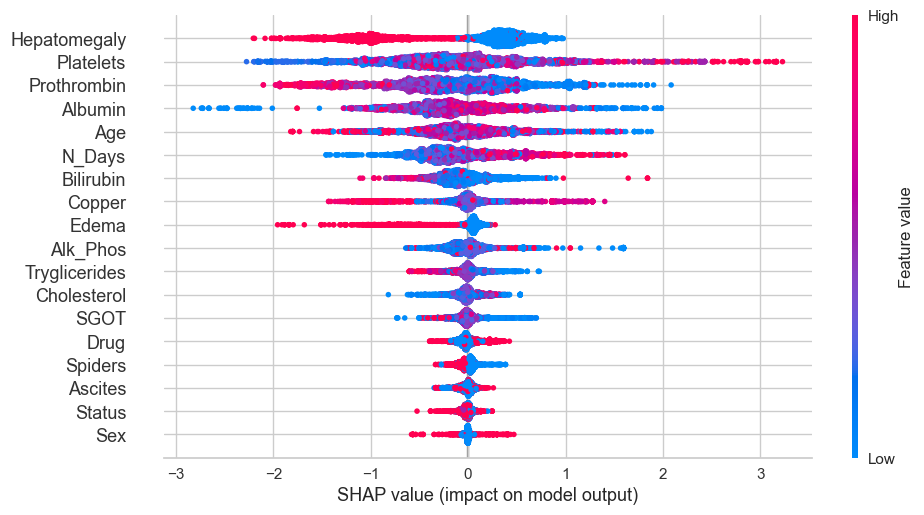

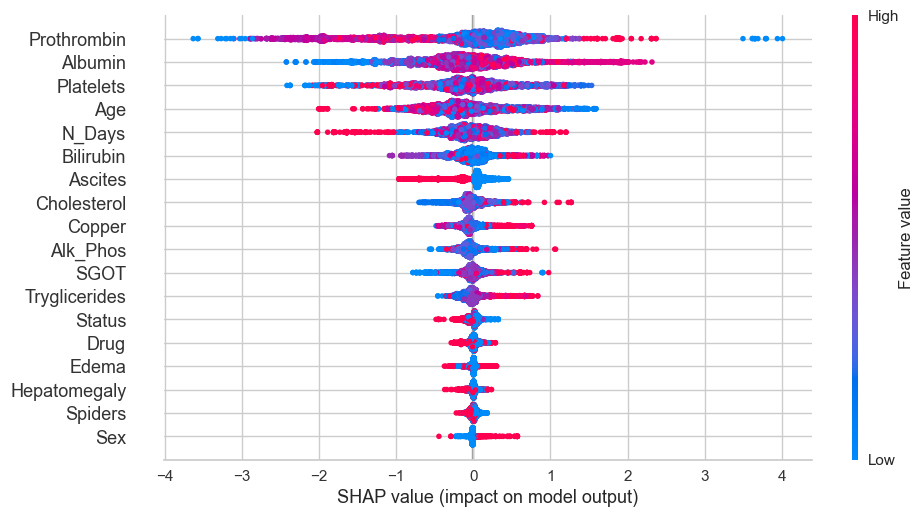

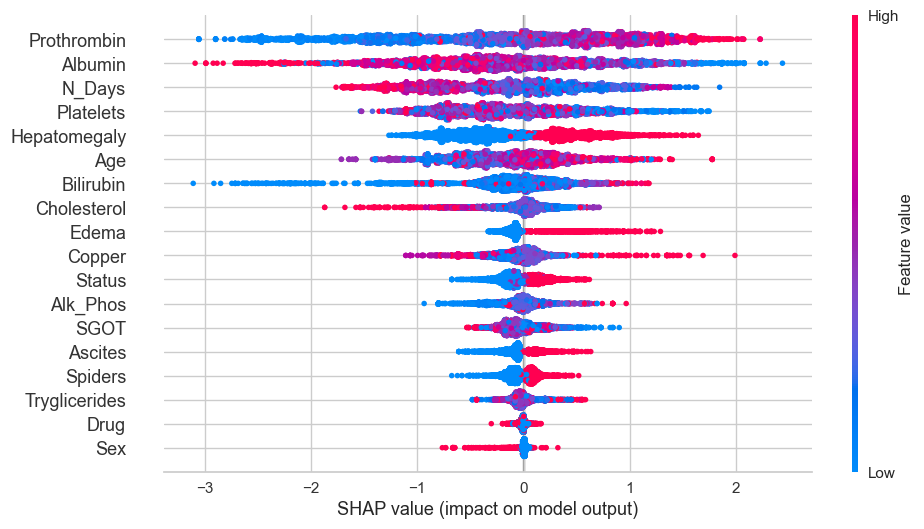

<Figure size 800x550 with 0 Axes>

In [154]:
plt.figure(figsize=(5, 15))
for idx in range(3):
    plt.subplot(3, 1, idx+1)
    shap.summary_plot(shap_values[:, :, idx], x_test, title="dfd", plot_size=(10, 15))
    plt.tight_layout()
    #plt.title("Stage : {}".format(idx+1))
plt.show()

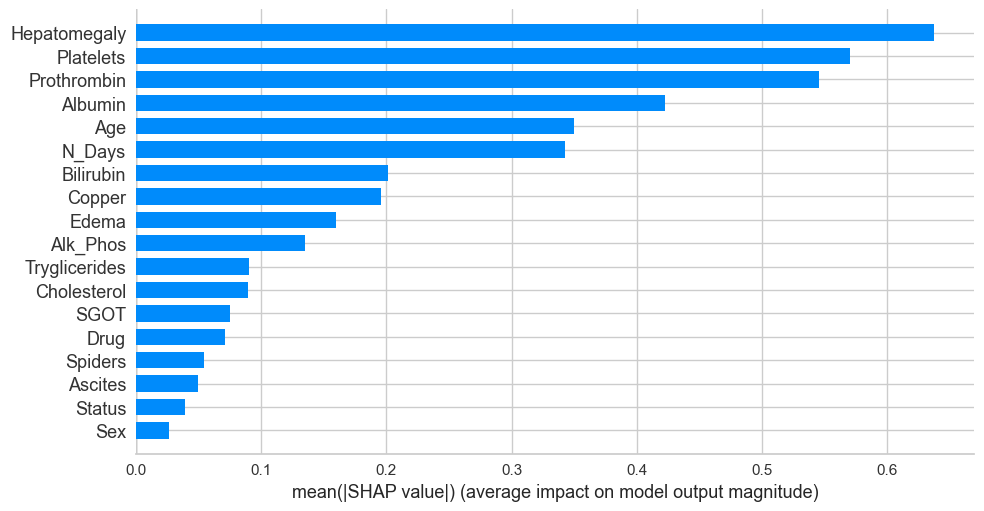

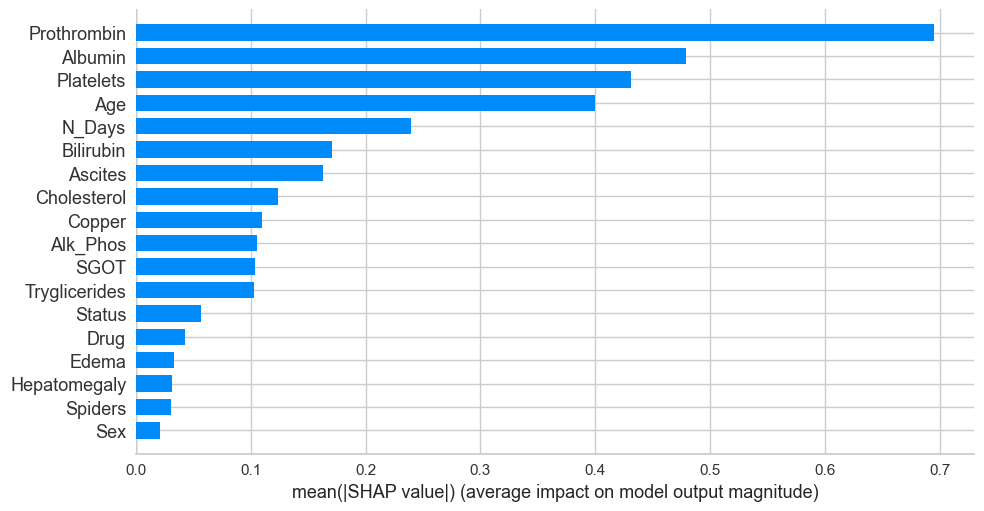

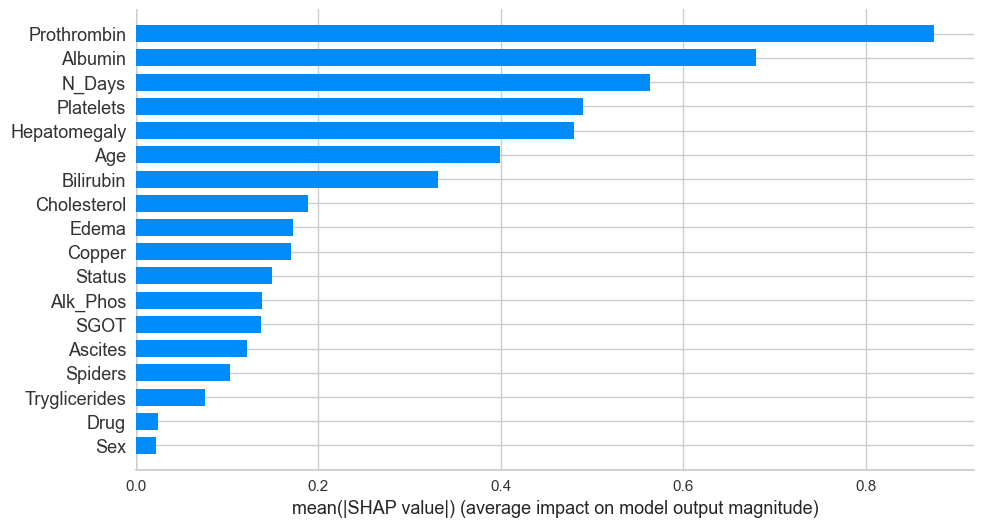

<Figure size 800x550 with 0 Axes>

In [149]:
plt.figure(figsize=(5, 15))
for idx in range(3):
    plt.subplot(3, 1, idx+1)
    shap.summary_plot(shap_values[:, :, idx], x_test, title="dfd", plot_size=(10, 15), plot_type="bar")
    plt.tight_layout()
plt.show()

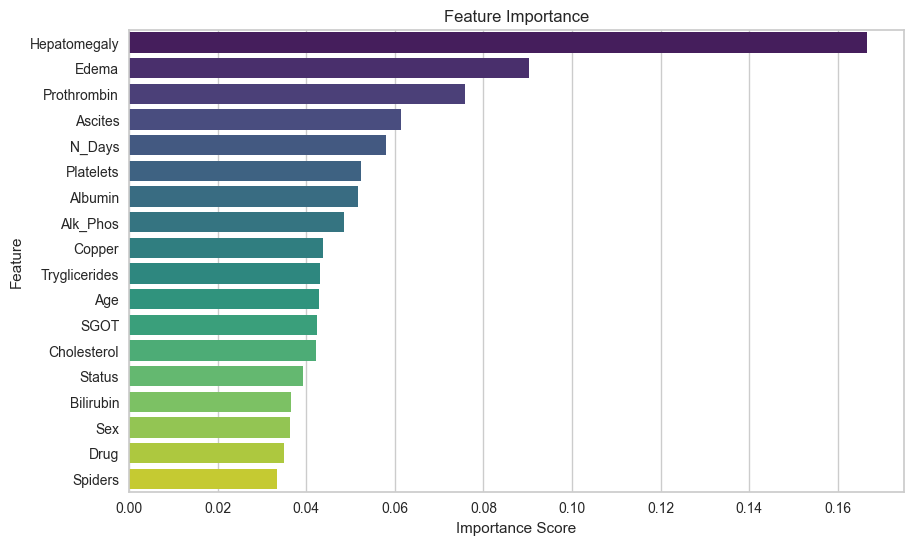

In [160]:
# Get feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## LIME

In [150]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train.values, 
    feature_names=x_train.columns,
    mode='classification')

In [152]:
# observation index
i = 0

exp = explainer.explain_instance(x_test.iloc[i], best_xgb_model.predict_proba, num_features=5)
exp.show_in_notebook()

 ### PDP

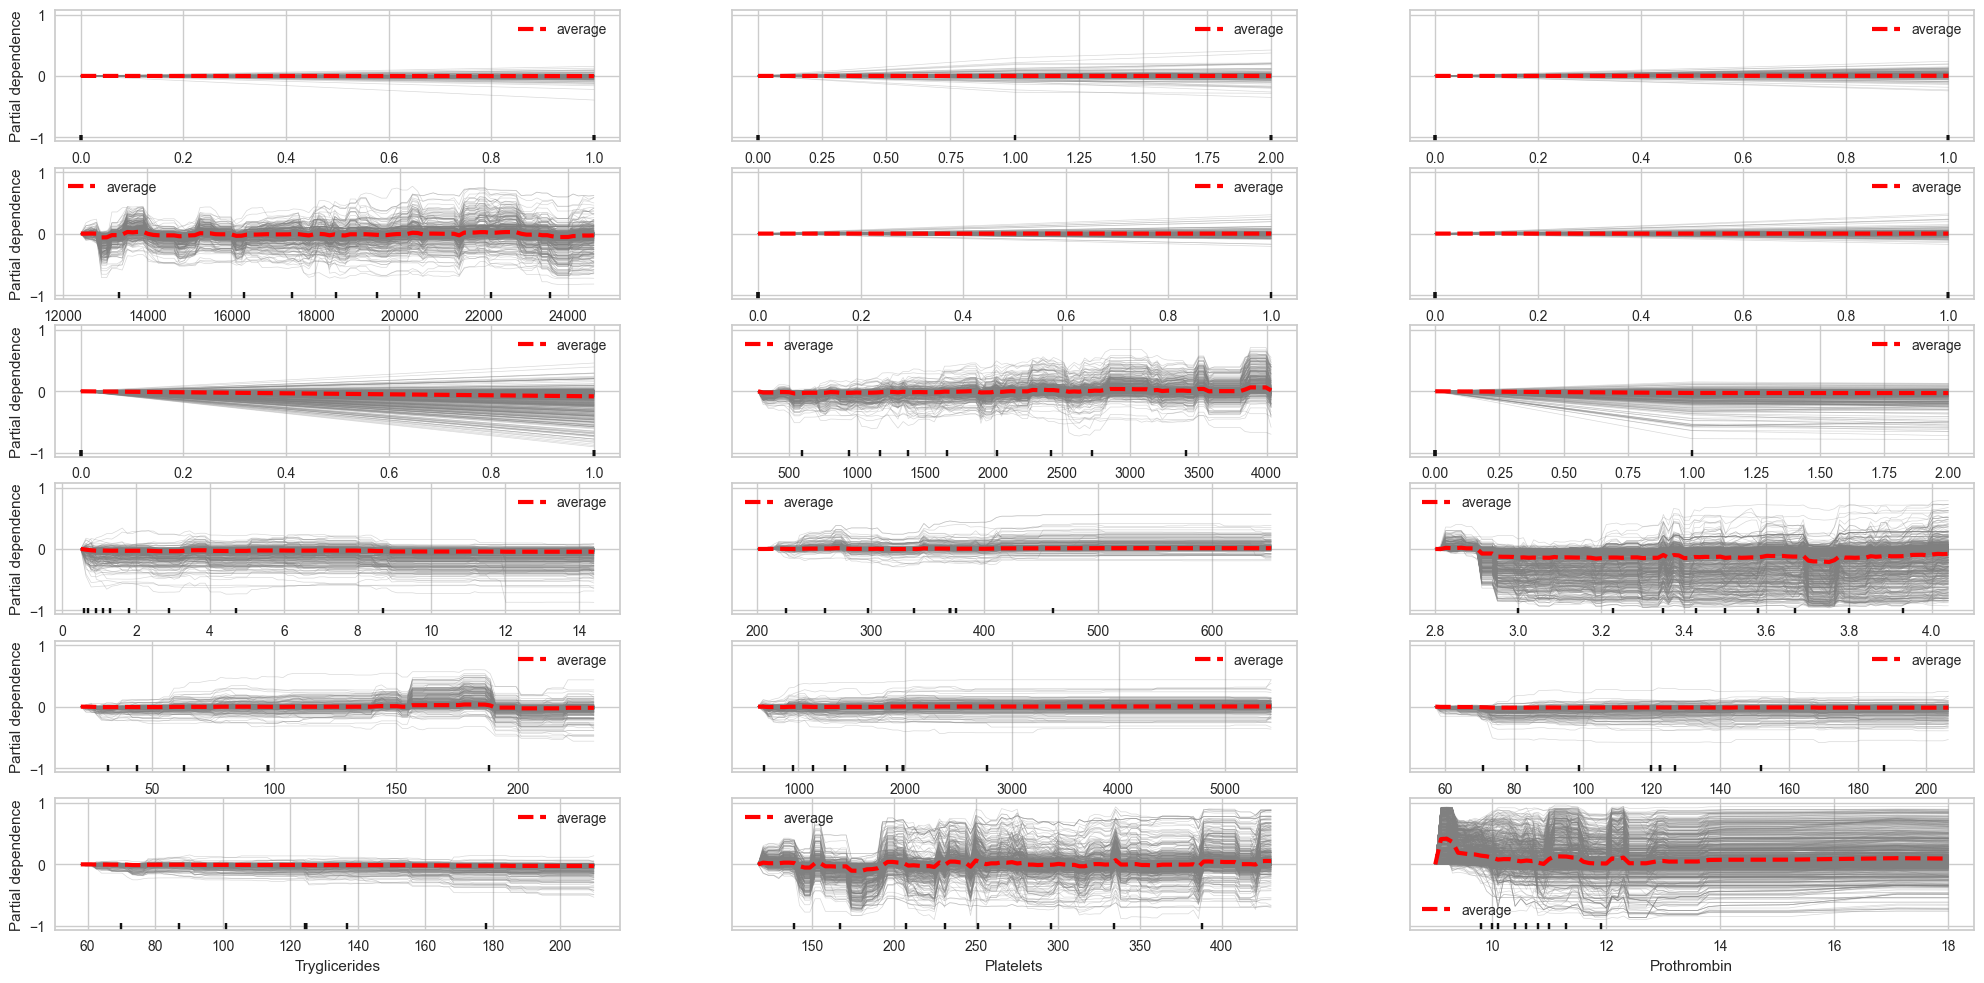

In [157]:
cols = x_test.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_xgb_model.feature_importances_, -18)[-18:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_xgb_model,
                                            ax=ax,
                                            X=x_test,
                                            features=[i for i in included_features_indices],
                                            feature_names=x_train.columns,
                                            target=0,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

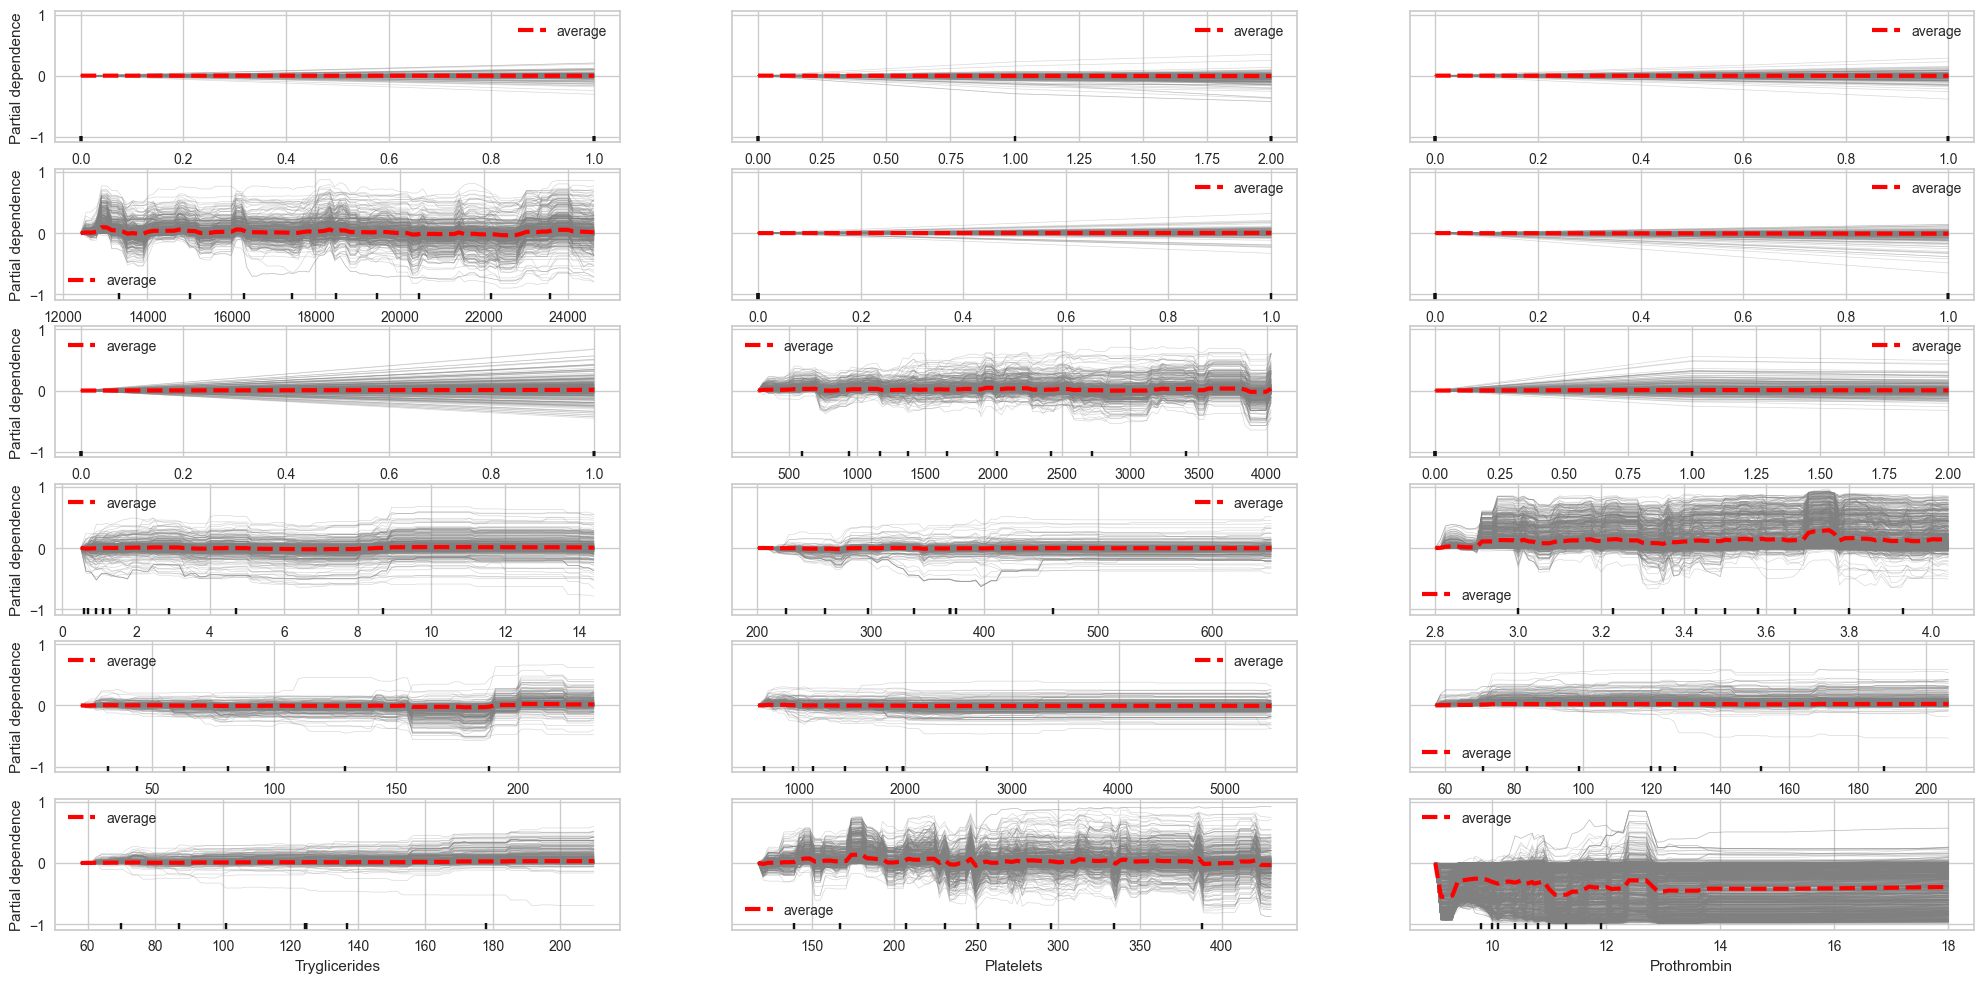

In [158]:
cols = x_test.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_xgb_model.feature_importances_, -18)[-18:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_xgb_model,
                                            ax=ax,
                                            X=x_test,
                                            features=[i for i in included_features_indices],
                                            feature_names=x_train.columns,
                                            target=1,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

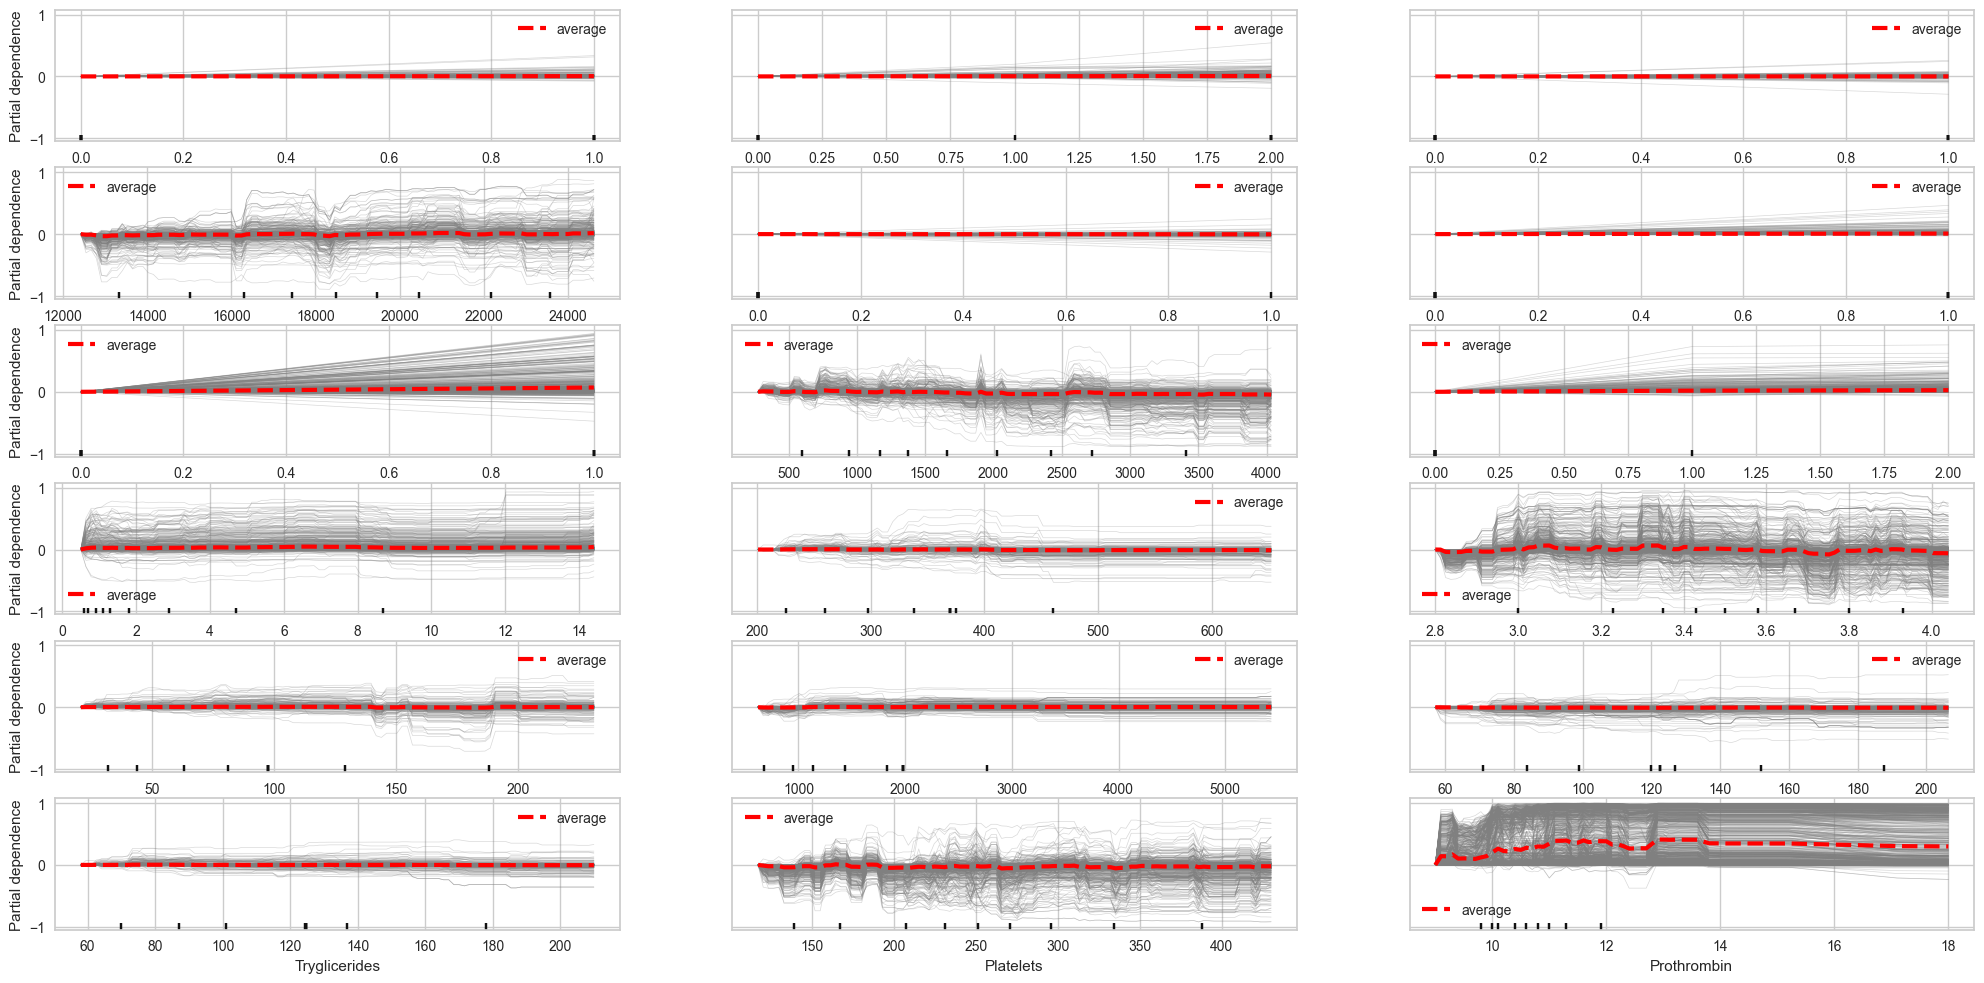

In [159]:
cols = x_test.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_xgb_model.feature_importances_, -18)[-18:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_xgb_model,
                                            ax=ax,
                                            X=x_test,
                                            features=[i for i in included_features_indices],
                                            feature_names=x_train.columns,
                                            target=2,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

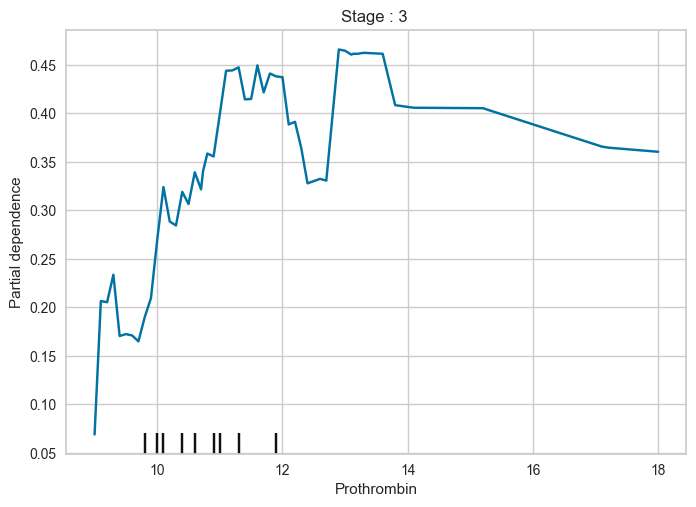

In [169]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define the features for which you want to plot partial dependency plots
features = ['Prothrombin']  # Replace with the actual feature names or indices

# Specify the target class for which you want to visualize the PDP
target_class = 2  # Replace with the class index you want to visualize (e.g., 0, 1, or 2)

# Plot partial dependence for the specified target class
PartialDependenceDisplay.from_estimator(best_xgb_model, x_train, features, target=target_class)
plt.title("Stage : 3 ")
plt.show()



Index: 0, Feature Name: N_Days
Index: 1, Feature Name: Status
Index: 2, Feature Name: Drug
Index: 3, Feature Name: Age
Index: 4, Feature Name: Sex
Index: 5, Feature Name: Ascites
Index: 6, Feature Name: Hepatomegaly
Index: 7, Feature Name: Spiders
Index: 8, Feature Name: Edema
Index: 9, Feature Name: Bilirubin
Index: 10, Feature Name: Cholesterol
Index: 11, Feature Name: Albumin
Index: 12, Feature Name: Copper
Index: 13, Feature Name: Alk_Phos
Index: 14, Feature Name: SGOT
Index: 15, Feature Name: Tryglicerides
Index: 16, Feature Name: Platelets
Index: 17, Feature Name: Prothrombin
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


AttributeError: 'NoneType' object has no attribute 'set_ylabel'

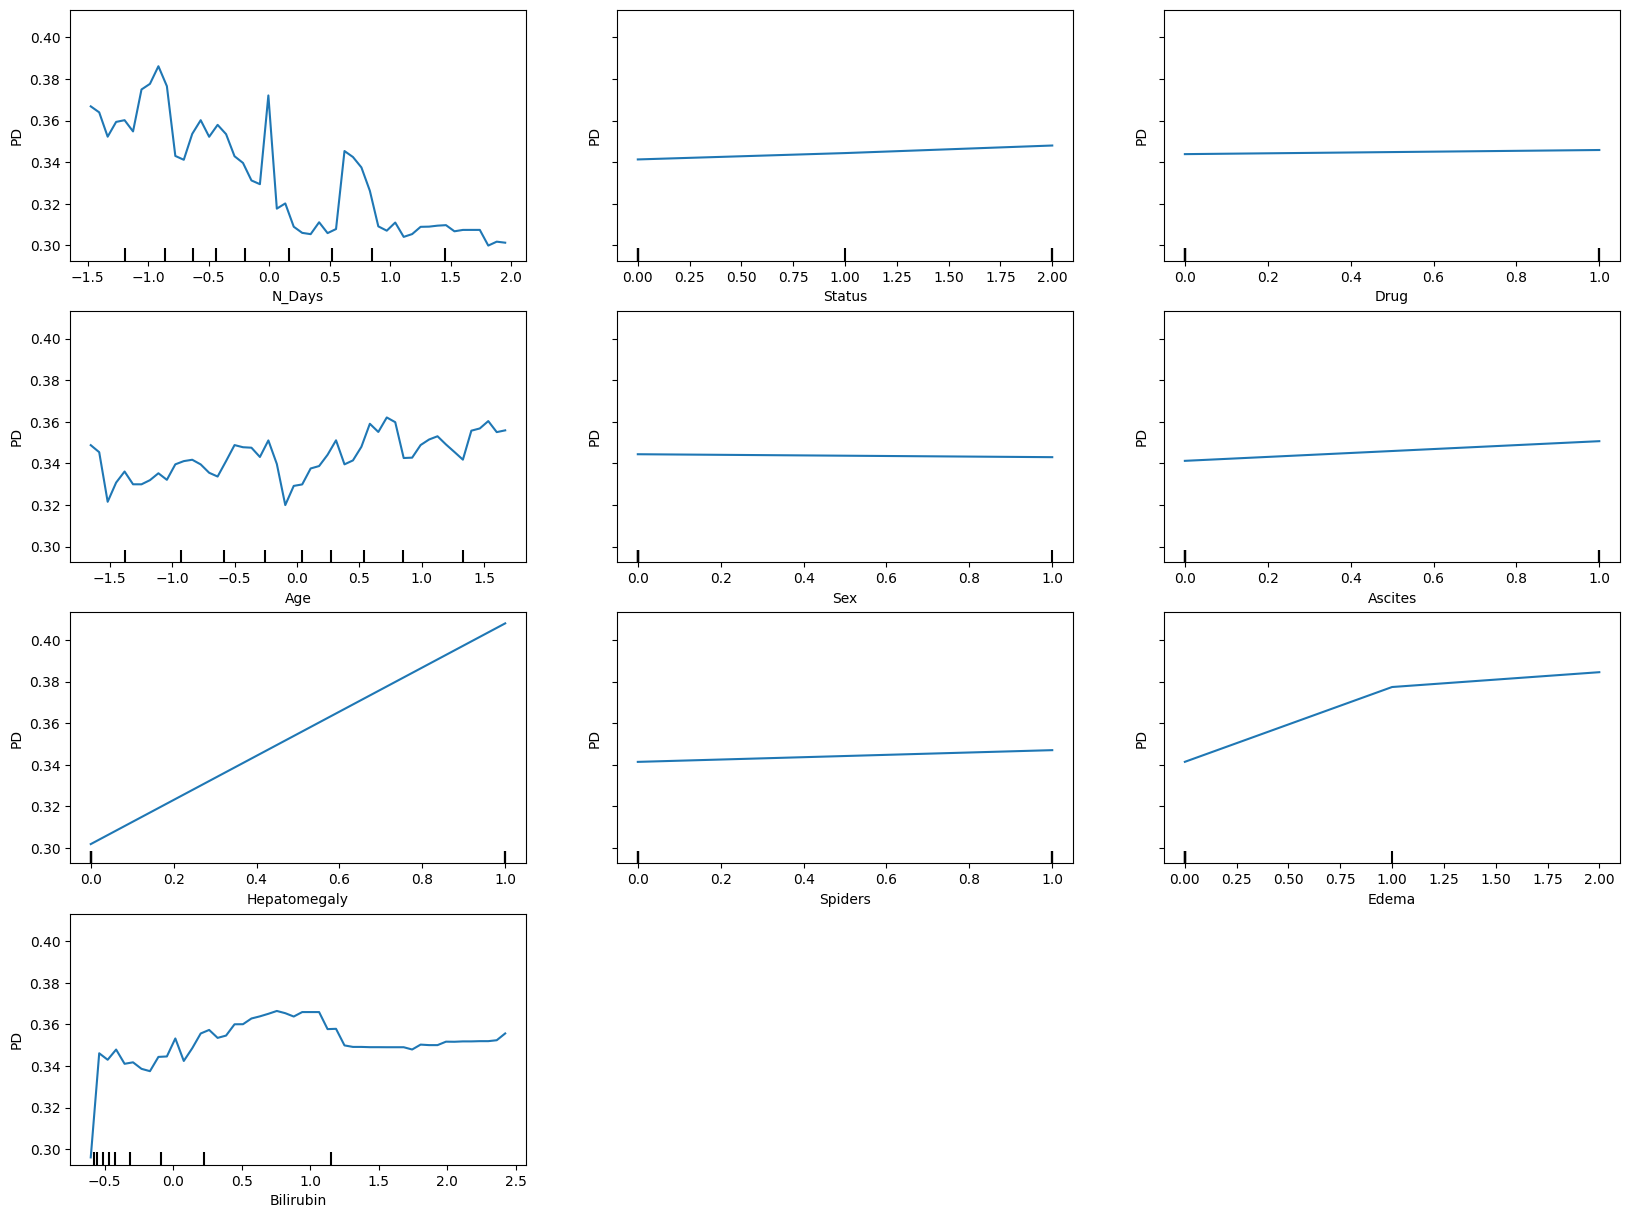

In [41]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming x_train is a pandas DataFrame
feature_names = x_train.columns
for idx, name in enumerate(feature_names):
    print(f"Index: {idx}, Feature Name: {name}")

# Selected features for PDP
selected_features = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin']
selected_indices = [list(feature_names).index(name) for name in selected_features if name in feature_names]
print("Selected feature indices:", selected_indices)

# Specifying the target class index (e.g., 0 for the first class)
target_class_index = 2  # Change this to 1 or 0 if you want to analyze other classes

# Set up the figure size
fig, ax = plt.subplots(figsize=(20, 15))  # You can adjust these numbers to change the size (width, height)

# Generating Partial Dependence Plots
disp = PartialDependenceDisplay.from_estimator(
    estimator=best_xgb_model,
    X=x_train,
    features=selected_indices,
    grid_resolution=50,
    target=target_class_index,  # Specify the class you want to analyze
    ax=ax
)

# Customizing the y-axis label
for ax in disp.axes_.ravel():
    ax.set_ylabel('PD')  # Setting the y-axis label to 'PD' for all plots

plt.show()


Index: 0, Feature Name: N_Days
Index: 1, Feature Name: Status
Index: 2, Feature Name: Drug
Index: 3, Feature Name: Age
Index: 4, Feature Name: Sex
Index: 5, Feature Name: Ascites
Index: 6, Feature Name: Hepatomegaly
Index: 7, Feature Name: Spiders
Index: 8, Feature Name: Edema
Index: 9, Feature Name: Bilirubin
Index: 10, Feature Name: Cholesterol
Index: 11, Feature Name: Albumin
Index: 12, Feature Name: Copper
Index: 13, Feature Name: Alk_Phos
Index: 14, Feature Name: SGOT
Index: 15, Feature Name: Tryglicerides
Index: 16, Feature Name: Platelets
Index: 17, Feature Name: Prothrombin
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


<Figure size 2000x1500 with 0 Axes>

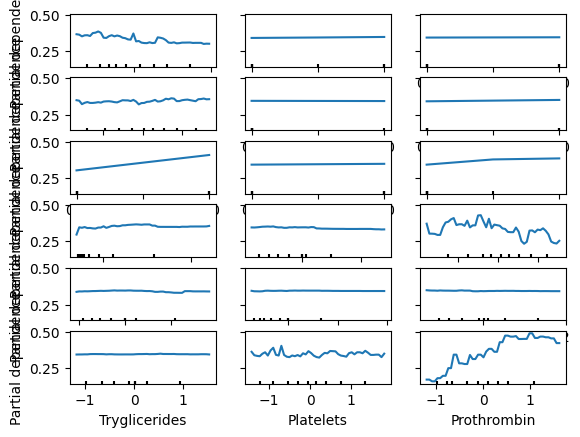

In [39]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming x_train is a pandas DataFrame
feature_names = x_train.columns
for idx, name in enumerate(feature_names):
    print(f"Index: {idx}, Feature Name: {name}")

# Selected features for PDP
selected_features = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
selected_indices = [list(feature_names).index(name) for name in selected_features if name in feature_names]
print("Selected feature indices:", selected_indices)

# Specifying the target class index (e.g., 0 for the first class)
target_class_index = 2  # Change this to 1 or 0 if you want to analyze other classes

# Set up the figure size
plt.figure(figsize=(20, 15))  # You can adjust these numbers to change the size (width, height)

# Generating Partial Dependence Plots
PartialDependenceDisplay.from_estimator(
    estimator=best_xgb_model,
    X=x_train,
    features=selected_indices,
    grid_resolution=50,
    target=target_class_index  # Specify the class you want to analyze
)

plt.show()


Index: 0, Feature Name: N_Days
Index: 1, Feature Name: Status
Index: 2, Feature Name: Drug
Index: 3, Feature Name: Age
Index: 4, Feature Name: Sex
Index: 5, Feature Name: Ascites
Index: 6, Feature Name: Hepatomegaly
Index: 7, Feature Name: Spiders
Index: 8, Feature Name: Edema
Index: 9, Feature Name: Bilirubin
Index: 10, Feature Name: Cholesterol
Index: 11, Feature Name: Albumin
Index: 12, Feature Name: Copper
Index: 13, Feature Name: Alk_Phos
Index: 14, Feature Name: SGOT
Index: 15, Feature Name: Tryglicerides
Index: 16, Feature Name: Platelets
Index: 17, Feature Name: Prothrombin
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


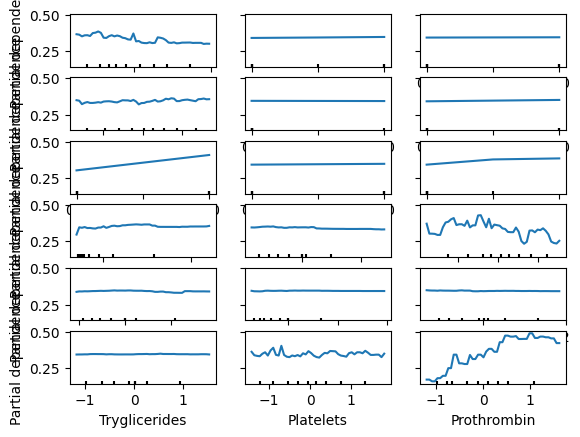

In [38]:
# Assuming x_train is a pandas DataFrame
feature_names = x_train.columns
for idx, name in enumerate(feature_names):
    print(f"Index: {idx}, Feature Name: {name}")

# Selected features for PDP
selected_features = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
selected_indices = [list(feature_names).index(name) for name in selected_features if name in feature_names]
print("Selected feature indices:", selected_indices)

# Specifying the target class index (e.g., 0 for the first class)
target_class_index = 2 # Change this to 1 or 2 if you want to analyze other classes

# Generating Partial Dependence Plots
PartialDependenceDisplay.from_estimator(
    estimator=best_xgb_model,
    X=x_train,
    features=selected_indices,
    grid_resolution=50,
    target=target_class_index  # Specify the class you want to analyze
)

plt.show()

In [30]:
from sklearn.inspection import PartialDependenceDisplay
feature_names = best_xgb_model.feature_names_in_
for idx, name in enumerate(feature_names):
    print(f"Index: {idx}, Feature Name: {name}")                                                                                                                                             from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot as plt                                                                                                                                                                selected_features = ['Temperature', 'Atmospheric_Pressure', 'Precipitation_percent','Visibility_km','UV_Index']
selected_indices = [list(feature_names).index(name) for name in selected_features]
print("Selected feature indices:", selected_indices)                                                                                                                                                    target_classes = best_xgb_model.classes_
print("Target Classes:", target_classes)                                                                                                                                                                PartialDependenceDisplay.from_estimator(
    estimator=best_xgb_model,  
    X=X_train,  
    features=selected_indices,  
    grid_resolution=50, 
    target=0
)

plt.show()

SyntaxError: invalid syntax (1617713080.py, line 4)

In [35]:
from sklearn.inspection import PartialDependenceDisplay
# Assuming x_train is a pandas DataFrame
feature_names = x_train.columns
for idx, name in enumerate(feature_names):
    print(f"Index: {idx}, Feature Name: {name}")

# Selected features for PDP
selected_features = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
selected_indices = [list(feature_names).index(name) for name in selected_features]
print("Selected feature indices:", selected_indices)

# Generating Partial Dependence Plots
PartialDependenceDisplay.from_estimator(
    estimator=best_xgb_model,
    X=x_train,
    features=selected_indices,
    grid_resolution=50
)
plt.show()

Index: 0, Feature Name: N_Days
Index: 1, Feature Name: Status
Index: 2, Feature Name: Drug
Index: 3, Feature Name: Age
Index: 4, Feature Name: Sex
Index: 5, Feature Name: Ascites
Index: 6, Feature Name: Hepatomegaly
Index: 7, Feature Name: Spiders
Index: 8, Feature Name: Edema
Index: 9, Feature Name: Bilirubin
Index: 10, Feature Name: Cholesterol
Index: 11, Feature Name: Albumin
Index: 12, Feature Name: Copper
Index: 13, Feature Name: Alk_Phos
Index: 14, Feature Name: SGOT
Index: 15, Feature Name: Tryglicerides
Index: 16, Feature Name: Platelets
Index: 17, Feature Name: Prothrombin
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


ValueError: target must be specified for multi-class

In [34]:
# Print the actual feature names in the dataset
print("Feature Names in the Dataset:")
print(list(feature_names))

# Selected features for PDP - adjust these names to match the actual column names in x_train
selected_features = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
# Check if all selected features are in feature_names
for feature in selected_features:
    if feature not in feature_names:
        print(f"Feature '{feature}' is not in the dataset's feature names.")

# Assuming the names are correct, proceed to get indices
selected_indices = [list(feature_names).index(name) for name in selected_features if name in feature_names]

if len(selected_indices) != len(selected_features):
    print("Some selected features were not found in the feature names.")

print("Selected feature indices:", selected_indices)

# Generating Partial Dependence Plots
PartialDependenceDisplay.from_estimator(
    estimator=best_xgb_model,
    X=x_train,
    features=selected_indices,
    grid_resolution=50
)

plt.show()

Feature Names in the Dataset:
['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


ValueError: target must be specified for multi-class

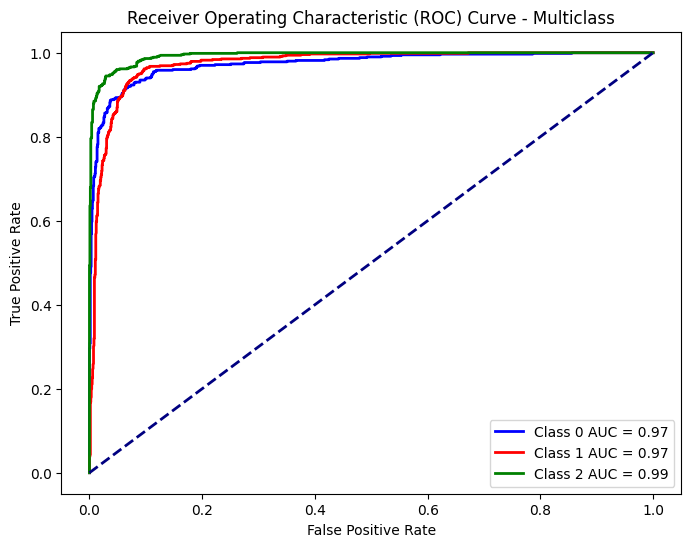

Macro-average AUC: 0.98
Micro-average AUC: 0.98


In [88]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming `best_xgb_model` is your trained model, and `x_test`, `y_test_adjusted` are your test data

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test_adjusted, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_xgb_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

# Optionally, calculate the macro and micro average ROC AUC
# Macro-average ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Micro-average ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Macro-average AUC: {roc_auc['macro']:.2f}")
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


Applying RFE

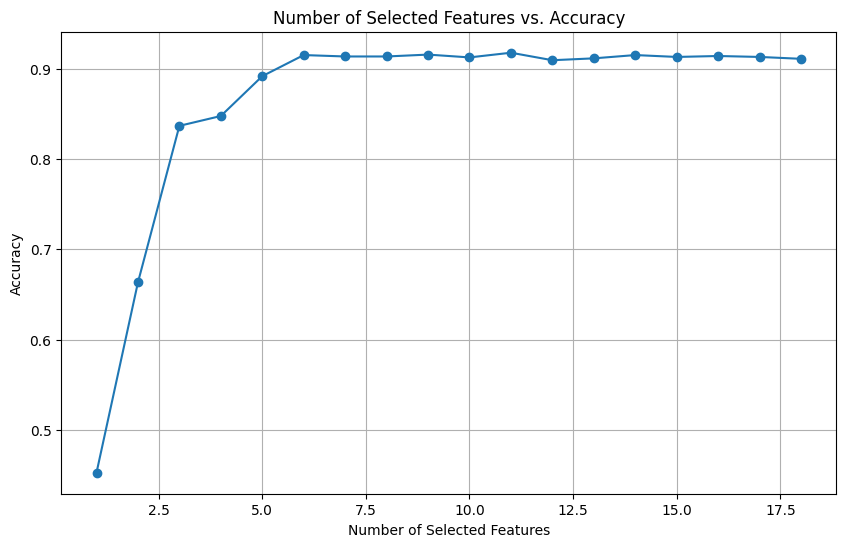

In [104]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize lists to store results
n_features_list = []
accuracy_list = []

# Loop through the number of features to select from 18 to 1
for n_features in range(18, 0, -1):
    # Initialize RFE with the current number of features
    rfe = RFE(estimator=best_xgb_model, n_features_to_select=n_features)
    
    # Fit RFE to the training data
    rfe.fit(x_train, y_train_adjusted)
    
    # Get the selected features
    selected_features = x_train.columns[rfe.support_]
    
    # Train XGBoost model with selected features
    best_xgb_model_rfe = best_xgb_model.fit(x_train[selected_features], y_train_adjusted)
    
    # Make predictions on the test set using the model with selected features
    y_pred_test_rfe = best_xgb_model_rfe.predict(x_test[selected_features])
    
    # Calculate accuracy
    accuracy_rfe = accuracy_score(y_test_adjusted, y_pred_test_rfe)
    
    # Store the results
    n_features_list.append(n_features)
    accuracy_list.append(accuracy_rfe)

# Plot n_features_to_select vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_features_list, accuracy_list, marker='o')
plt.title('Number of Selected Features vs. Accuracy')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Maximum Accuracy at 11 features.

In [105]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 19 features
rfe = RFE(estimator=best_xgb_model, n_features_to_select=11)

# Fit RFE to the training data
rfe.fit(x_train, y_train_adjusted)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train XGBoost model with selected features
best_xgb_model_rfe = best_xgb_model.fit(x_train[selected_features], y_train_adjusted)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_xgb_model_rfe.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test_adjusted, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of XGBoost model with RFE (11 features):", accuracy_rfe)

Accuracy of XGBoost model with RFE (11 features): 0.9175311203319502


Applying Feature Importance

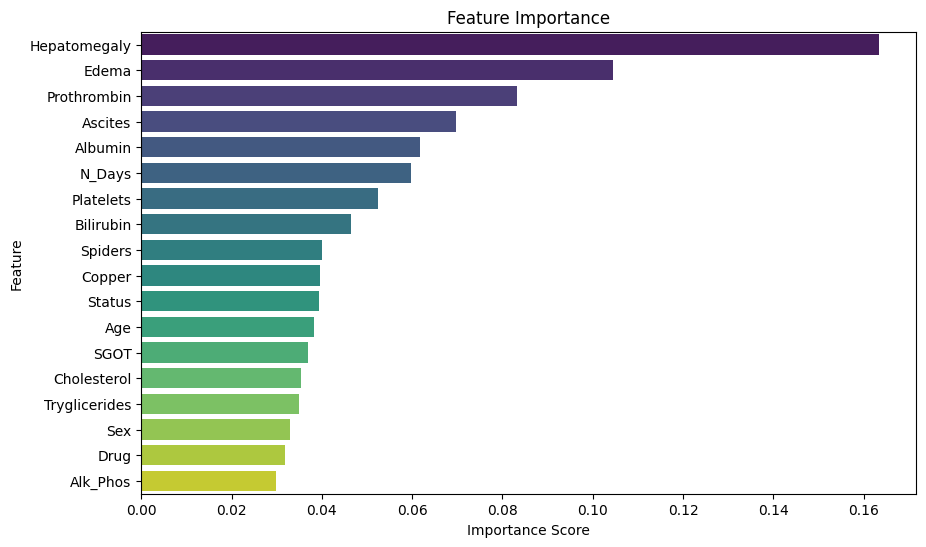

In [45]:
# Get feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Removing least important variables and Fitting XGB

Alk_Phos

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation, excluding the 'Alk_Phos' column
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['Alk_Phos']), y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set, excluding the 'Alk_Phos' column
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['Alk_Phos']))

# Make predictions on the training set, excluding the 'Alk_Phos' column
y_pred_train = best_xgb_model.predict(x_train.drop(columns=['Alk_Phos']))

# Calculate accuracies
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)

# Generate the classification report and confusion matrix for the test set
classification_report_result = classification_report(y_test_adjusted, y_pred_test)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
conf_matrix_train = confusion_matrix(y_train_adjusted, y_pred_train)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test Set):")
print(classification_report_result)

# Optionally, print the confusion matrices
print("Confusion Matrix (Test Set):")
print(conf_matrix)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)


Train Accuracy: 0.9908
Test Accuracy: 0.9129
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       599
           1       0.90      0.90      0.90       678
           2       0.93      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928

Confusion Matrix (Test Set):
[[536  48  15]
 [ 39 610  29]
 [ 16  21 614]]
Confusion Matrix (Training Set):
[[2385   36    5]
 [  17 2608    5]
 [   2    6 2647]]


Alk_Phos AND Drug


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation, excluding the 'Alk_Phos' column
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['Alk_Phos',"Drug"]), y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set, excluding the 'Alk_Phos' column
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['Alk_Phos',"Drug"]))

# Make predictions on the training set, excluding the 'Alk_Phos' column
y_pred_train = best_xgb_model.predict(x_train.drop(columns=['Alk_Phos',"Drug"]))

# Calculate accuracies
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)

# Generate the classification report and confusion matrix for the test set
classification_report_result = classification_report(y_test_adjusted, y_pred_test)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
conf_matrix_train = confusion_matrix(y_train_adjusted, y_pred_train)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test Set):")
print(classification_report_result)

# Optionally, print the confusion matrices
print("Confusion Matrix (Test Set):")
print(conf_matrix)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)


Train Accuracy: 0.9828
Test Accuracy: 0.9098
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       599
           1       0.90      0.90      0.90       678
           2       0.93      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928

Confusion Matrix (Test Set):
[[535  49  15]
 [ 41 608  29]
 [ 18  22 611]]
Confusion Matrix (Training Set):
[[2353   64    9]
 [  33 2589    8]
 [   4   15 2636]]


MLP

In [55]:
import tensorflow
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("liver_cirrhosis.csv")

In [57]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 15361


In [58]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
num_rows_after_removal = df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

Number of rows after removing duplicates: 9639


In [59]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})
df["Stage"] = df["Stage"].map({1:0, 2:1, 3:2})

In [60]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [61]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numericals] = scaler.fit_transform(x_train[numericals])
x_test[numericals] = scaler.transform(x_test[numericals])

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

# Assuming you have 3 classes in your target variable
num_classes = 3

# One-hot encode the labels if they are not already
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# validation Set
x_train , x_val, y_train_encoded , y_val = train_test_split(x_train,y_train_encoded,test_size=0.2,random_state=0)

# Build the model
model = Sequential()
model.add(InputLayer(shape=(18,)))
model.add(Dense(units=5, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=3, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=num_classes, activation="softmax"))  # Use softmax activation for multiclass

# Summary of the model
model.summary()

# Compile the model
optim = Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"])  # Use categorical_crossentropy

earlystopping = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True

)

# Train the model
model.fit(x_train, y_train_encoded, validation_data=(x_val,y_val), epochs=100,callbacks=earlystopping)

# Predict probabilities on the test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = y_pred_probs.argmax(axis=-1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_labels = y_test_encoded.argmax(axis=-1)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │            95 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 16 (64.00 B)

Epoch 1/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3610 - loss: 1.1294 - val_accuracy: 0.5029 - val_loss: 1.0171
Epoch 2/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4069 - loss: 1.0562 - val_accuracy: 0.5198 - val_loss: 0.9942
Epoch 3/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4307 - loss: 1.0438 - val_accuracy: 0.5204 - val_loss: 0.9783
Epoch 4/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4376 - loss: 1.0387 - val_accuracy: 0.5243 - val_loss: 0.9846
Epoch 5/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4228 - loss: 1.0374 - val_accuracy: 0.5113 - val_loss: 0.9732
Epoch 6/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4160 - loss: 1.0342 - val_accuracy: 0.5275 - val_loss: 0.9728
Epoch 7/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4486 - loss: 1.0360 - val_accuracy: 0.5269 - val_loss: 0.9675
Epoch 8/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4367 - loss: 1.0365 - val_accu